Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model, built-in docker, and use some library to display that in frontend

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
df=pd.read_csv("data\music_data.csv")

In [9]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [10]:
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [15]:
df = df.drop('filename',axis=1)

In [16]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = df.select_dtypes(include='object') .columns
numerical_cols = df.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')
categorical columns:  Index(['label'], dtype='object')


In [21]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

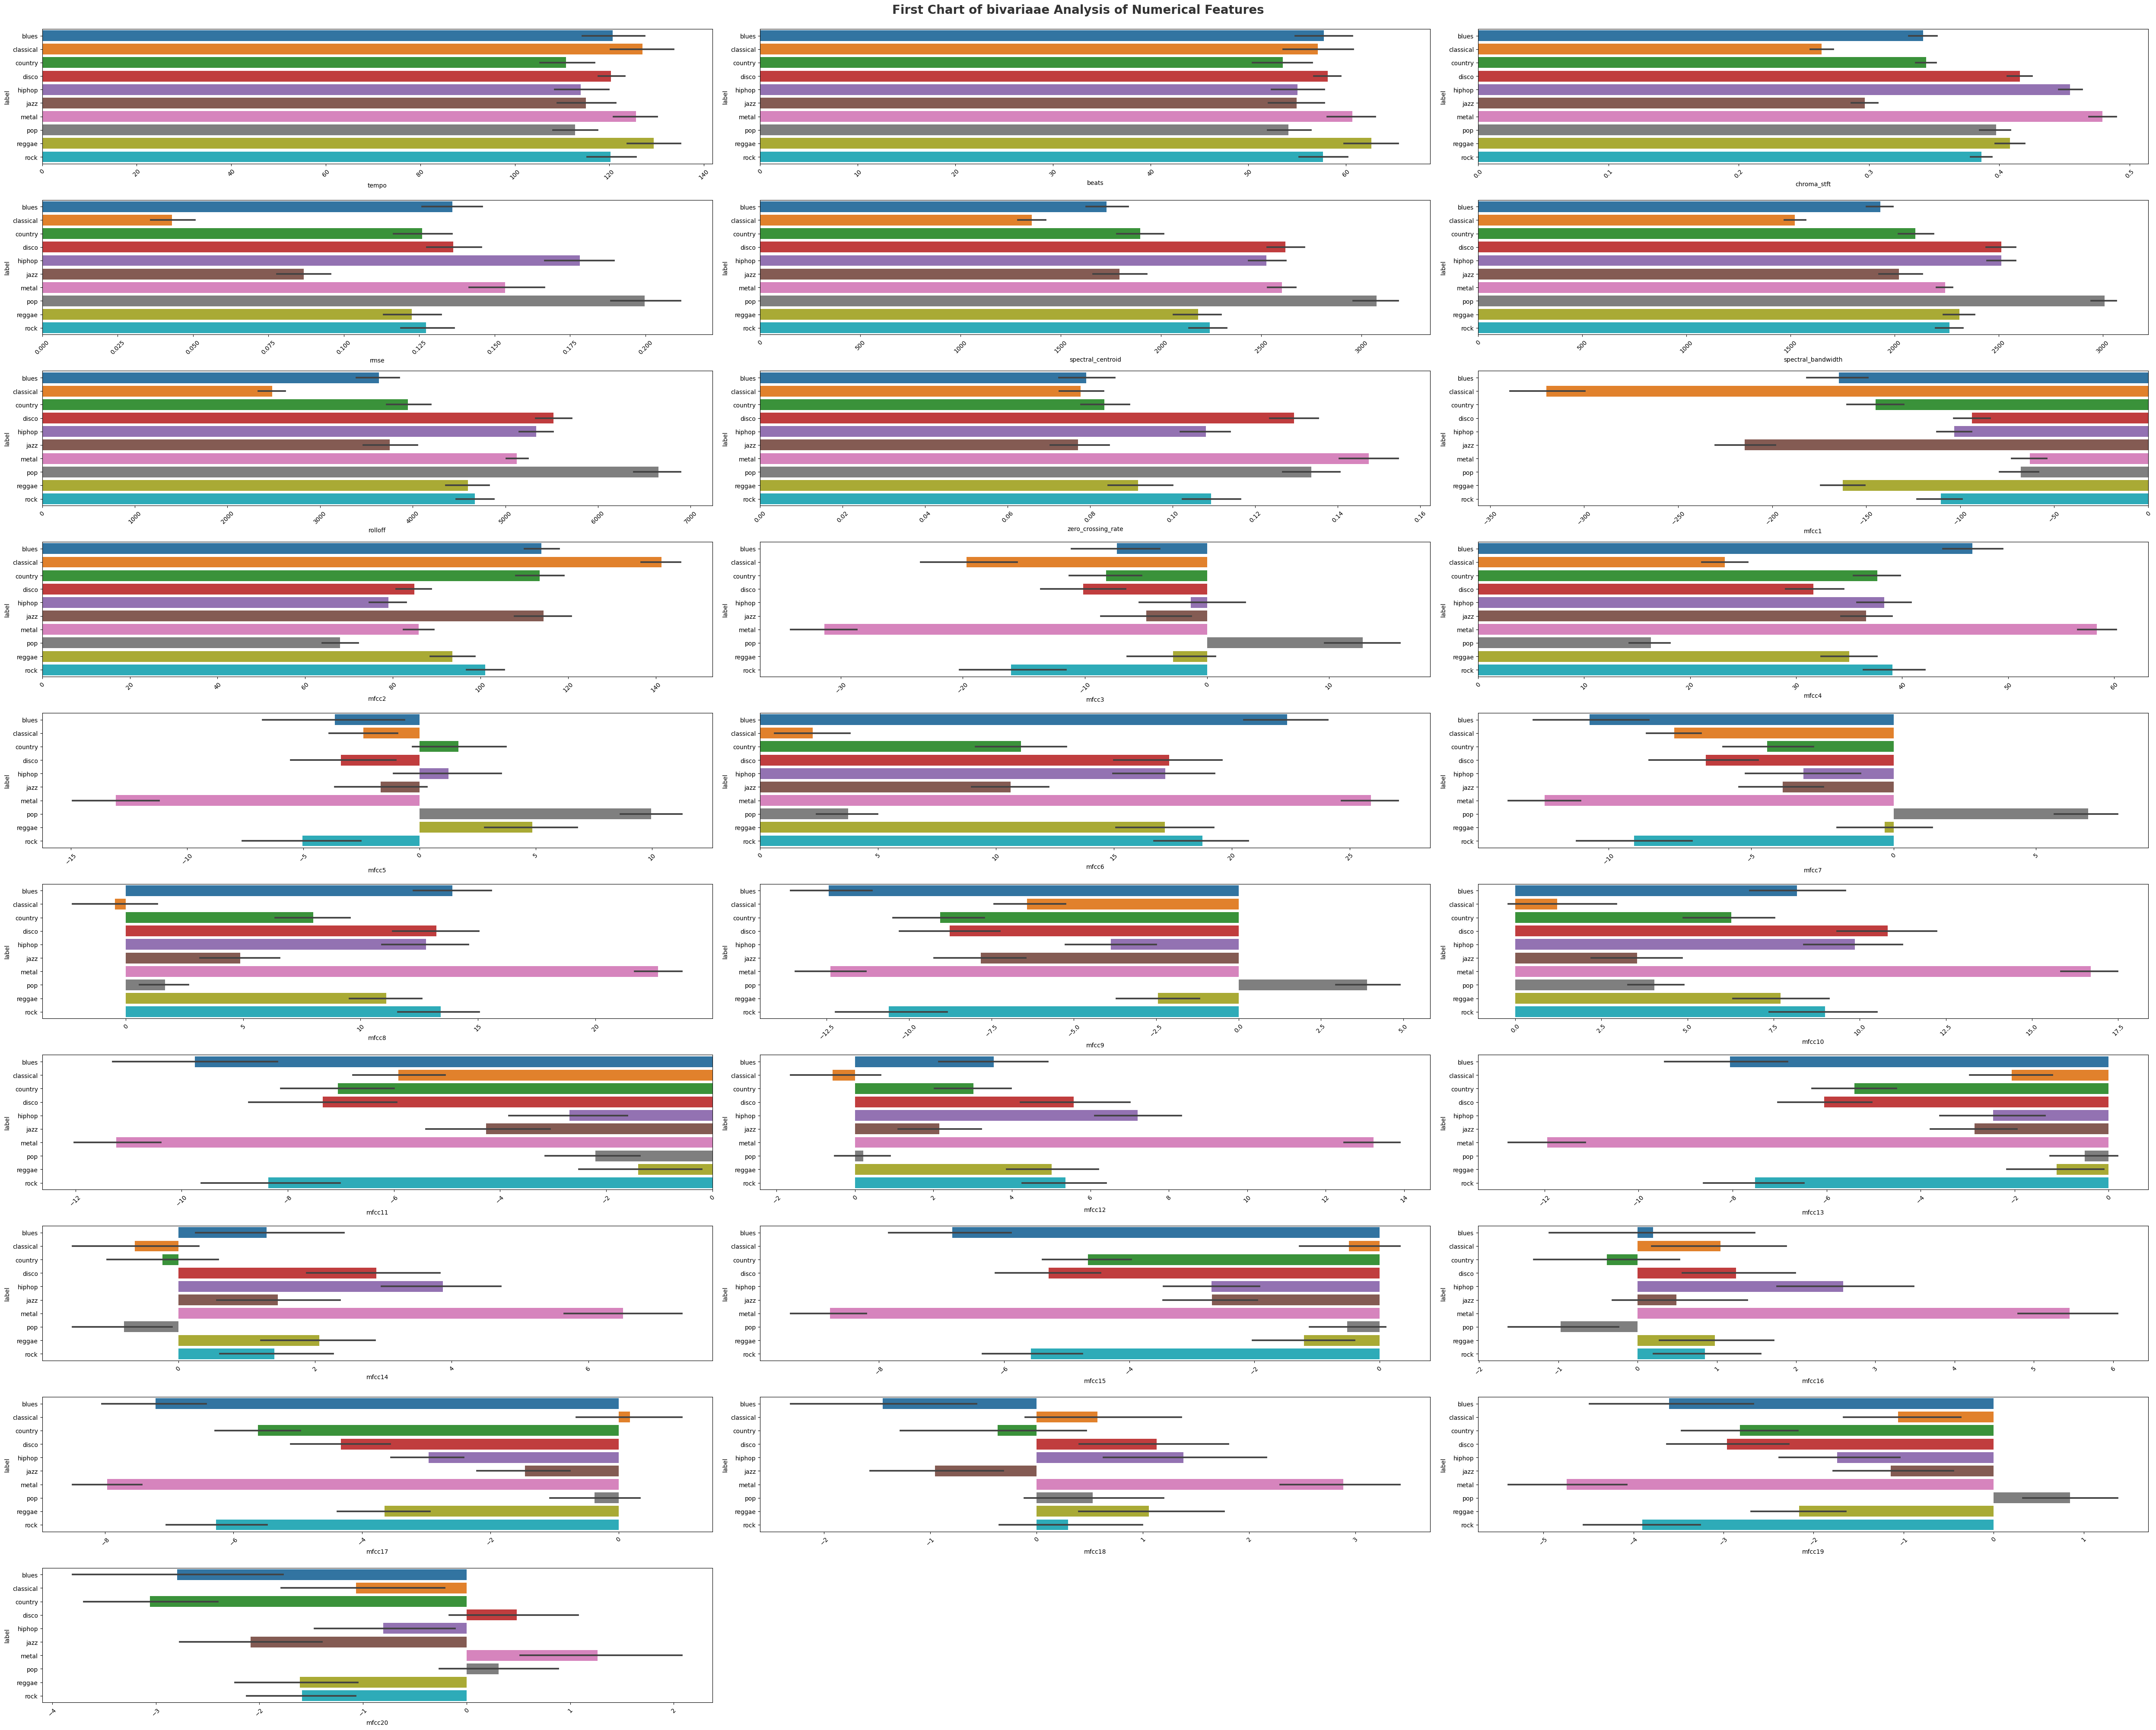

In [22]:
# plot for categorical columns
plt.figure(figsize=(50, 40))
plt.suptitle('First Chart of bivariaae Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols)):
    plt.subplot(10, 3, i+1)
    sns.barplot(data = df, x = df[numerical_cols[i]], y = 'label')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [26]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable_cols = LabelEncoder()

for i in categorical_cols:
    df[i] = lable_cols.fit_transform(df[i])

<AxesSubplot: >

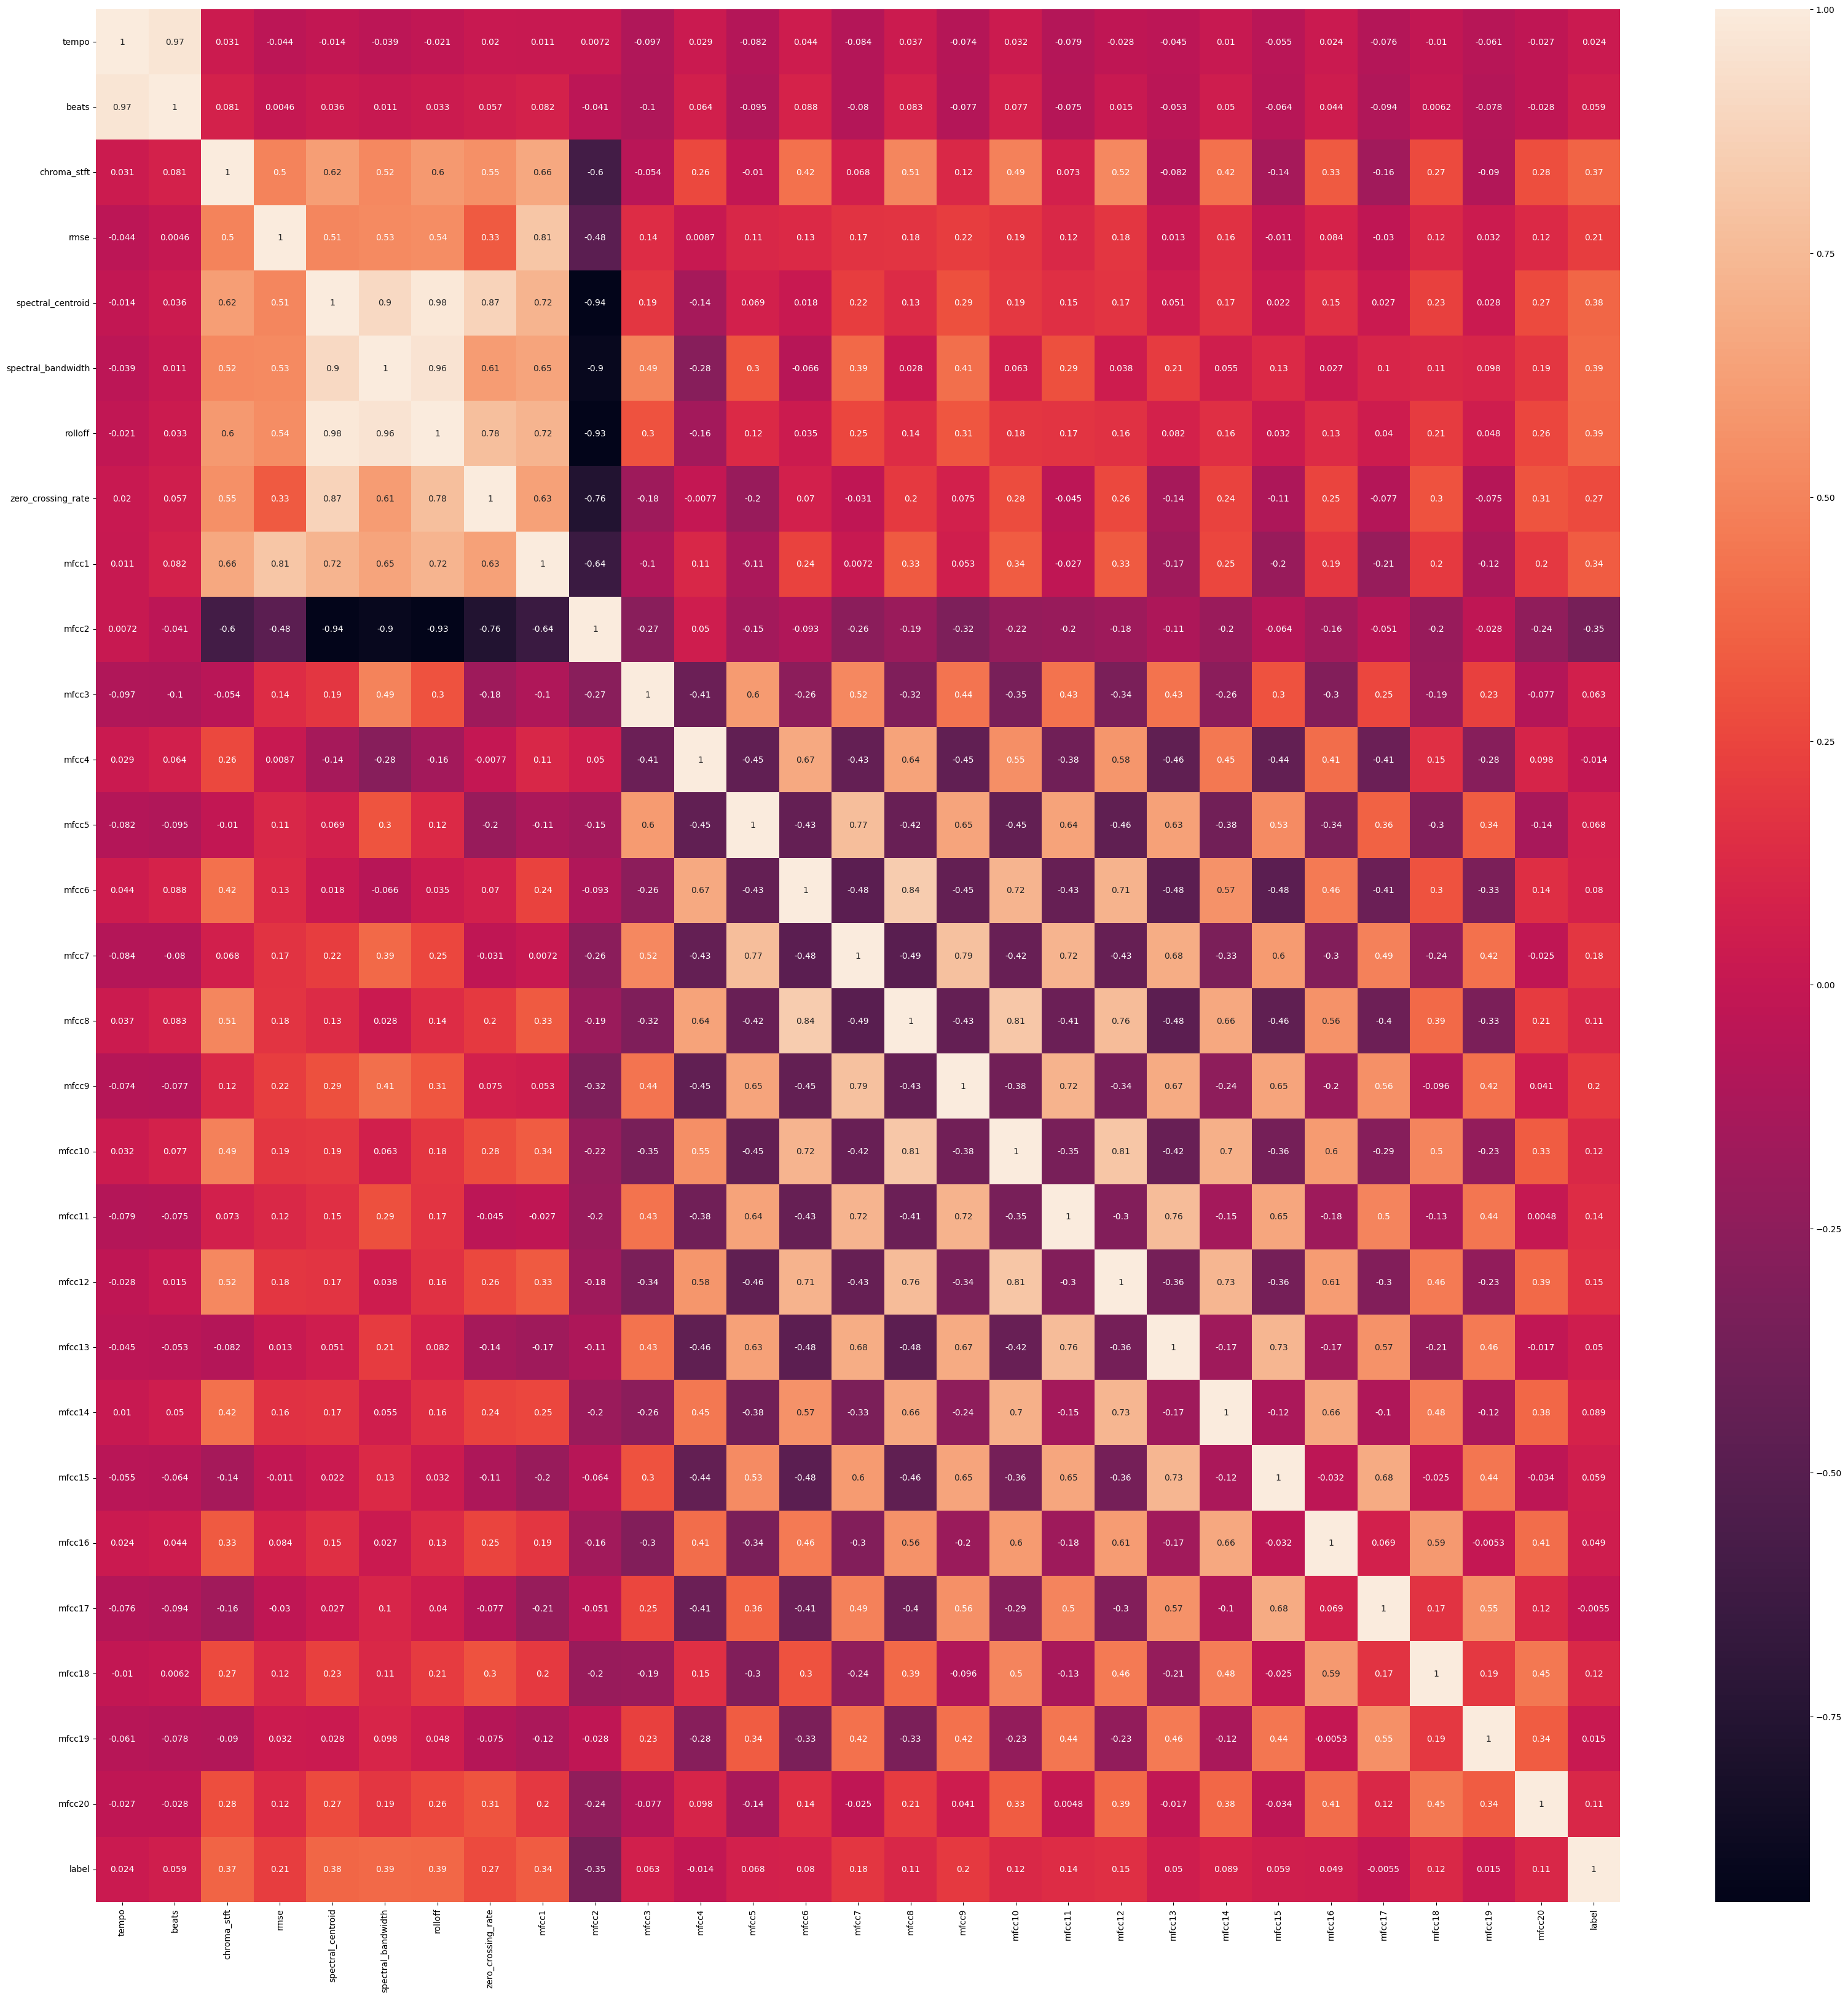

In [28]:
##corelation matrix
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)

In [29]:
df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


In [30]:
## Independent and dependent feature
X = df.drop(labels=['label'],axis=1)
Y = df[['label']]

In [31]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = X.select_dtypes(include='object') .columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')
categorical columns:  Index([], dtype='object')


In [32]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_cols),
    ("cat_pipline",cat_pipline,categorical_cols)
])

In [34]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipline__tempo,num_pipline__beats,num_pipline__chroma_stft,num_pipline__rmse,num_pipline__spectral_centroid,num_pipline__spectral_bandwidth,num_pipline__rolloff,num_pipline__zero_crossing_rate,num_pipline__mfcc1,num_pipline__mfcc2,...,num_pipline__mfcc11,num_pipline__mfcc12,num_pipline__mfcc13,num_pipline__mfcc14,num_pipline__mfcc15,num_pipline__mfcc16,num_pipline__mfcc17,num_pipline__mfcc18,num_pipline__mfcc19,num_pipline__mfcc20
0,0.109383,0.121198,-1.223609,-0.647493,-1.226248,-0.645470,-0.962635,-1.517918,-1.091485,0.360098,...,-2.144804,-1.008846,-0.389193,-2.594020,-1.800236,0.354385,-1.105044,-2.180801,-0.004296,0.092522
1,-0.846873,-0.923616,-0.847927,-0.802563,-0.812590,-1.278910,-0.926686,-0.070657,-0.702300,1.123220,...,0.889742,0.575296,0.021949,-0.259906,-0.462105,-0.200846,0.726235,-1.432145,0.284352,-1.586462
2,-0.428511,-0.366382,1.810073,-0.349183,1.162952,0.145090,0.723344,2.100126,0.671606,-1.189010,...,-0.228635,1.990673,-1.033956,1.664450,-1.427604,0.884284,-0.837416,0.532480,-0.202337,0.961386
3,-0.428511,-0.366382,-1.556955,-0.318061,-1.202063,-1.306171,-1.147706,-1.070274,-0.569781,1.463579,...,0.316048,-0.345530,0.897028,-0.774773,0.579003,-0.563037,1.027963,-0.237426,-0.002116,-0.243290
4,1.121889,1.096359,0.952685,0.758339,-0.202200,-0.038130,-0.018129,-0.745604,0.523756,-0.019013,...,-0.331443,1.334361,-0.287309,2.417158,0.876906,2.509295,0.931848,2.473150,0.499539,0.607541


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
model.score(X_train, y_train)

0.7275

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
accuracy_score(y_pred, y_test)

0.605

In [57]:
#Dicision Tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
tree.score(X_train, y_train)

1.0

In [59]:
y_pred = tree.predict(X_test)

In [60]:
accuracy_score(y_pred, y_test)

0.405

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train,y_train)

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_20848\1373693567.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Randomforest.fit(X_train,y_train)


RandomForestClassifier()

In [62]:
Randomforest.score(X_train,y_train)

1.0

In [63]:
y_pred = Randomforest.predict(X_test)

In [64]:
accuracy_score(y_pred, y_test)

0.595